In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merge_table = pd.merge(ride_data,city_data, on="city",how="left")

# Display the data table for preview
merge_table.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
urban = merge_table[merge_table["type"]=="Urban"].groupby([merge_table["city"]])
rural = merge_table[merge_table["type"]=="Rural"].groupby([merge_table["city"]])
suburban = merge_table[merge_table["type"]=="Suburban"].groupby([merge_table["city"]])

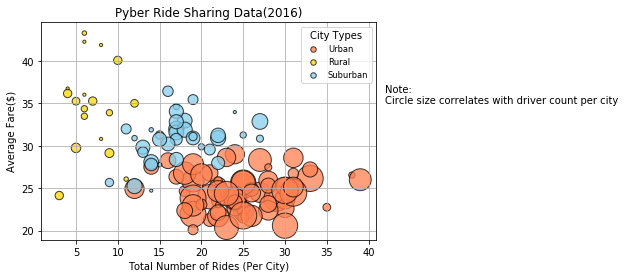

In [3]:
# Obtain the x and y coordinates for each of the three city types
urban_x = urban["ride_id"].count()
urban_y = urban["fare"].mean()
urban_s = urban["driver_count"].mean()

rural_x = rural["ride_id"].count()
rural_y = rural["fare"].mean()
rural_s = rural["driver_count"].mean()

suburban_x = suburban["ride_id"].count()
suburban_y = suburban["fare"].mean()
suburban_s = suburban["driver_count"].mean()

# Build the scatter plots for each city types
#color scheme (Gold, SkyBlue, and Coral)
plt.scatter(urban_x, urban_y, marker="o", color=["coral"], edgecolors="black", s=urban_s*10, alpha=0.75,label="Urban")
plt.scatter(rural_x, rural_y, marker="o", color=["gold"], edgecolors="black",s=rural_s*10, alpha=0.75,label="Rural")
plt.scatter(suburban_x, suburban_y, marker="o", color=["skyblue"], edgecolors="black",s=suburban_s*10, alpha=0.75,label="Suburban")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.title("Pyber Ride Sharing Data(2016)")

# Create a legend
legend = plt.legend(loc="upper right",fontsize='small',title="City Types")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]
# Incorporate a text label regarding circle size
textstr = "Note:\nCircle size correlates with driver count per city"
plt.text(42, 35, textstr, fontsize=10)
# Save Figure
plt.savefig("../Images/bubbleplot.png")

In [4]:
# Show plot
plt.show()

## Total Fares by City Type

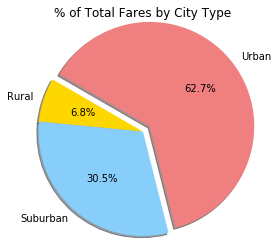

In [5]:
# Calculate Type Percents
city_type = merge_table.groupby("type")
fare = city_type["fare"].sum()

labels = ["Rural","Suburban","Urban"]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)

# Build Pie Chart
plt.pie(fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150,radius=1.2)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("../Images/totalfare_pie.png")
# Show Figure
plt.show()

## Total Rides by City Type

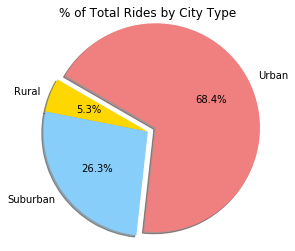

In [6]:
# Calculate Ride Percents
rides = city_type["ride_id"].count()

# Build Pie Chart
plt.pie(rides, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150,radius=1.2)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("../Images/totalrides_pie.png")
# Show Figure
plt.show()

## Total Drivers by City Type

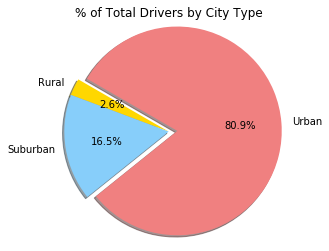

In [9]:
# Calculate Driver Percents
df_driver = merge_table[["city","driver_count","type"]]
df_driver = df_driver.drop_duplicates()
city_type_driver = df_driver.groupby("type")
driver = city_type_driver["driver_count"].sum()
# Build Pie Chart
plt.pie(driver, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150,radius=1.2)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("../Images/totaldrivers_pie.png")
# Show Figure
plt.show()